In [169]:
import numpy as np
from breizhcrops import BreizhCrops
import pandas as pd
import geopandas as gpd
import contextily as ctx

import torch
import torch.optim as optim
import torch.nn as nn
import torch.autograd as autograd
import torch.nn.functional as F
from torch.utils.data import DataLoader,Dataset

import torchvision
import numpy as np
import math

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pandas import DataFrame

In [2]:
frh01 = BreizhCrops(region="frh01", load_timeseries=False)
frh02 = BreizhCrops(region="frh02")
frh03 = BreizhCrops(region="frh03")
frh04 = BreizhCrops(region="frh04")

In [3]:
frh01_gdf = frh01.geodataframe()

In [4]:
element_idx = np.arange(0, len(frh01))

In [5]:
np.random.seed(0)

In [6]:
train_len = int(0.7*len(element_idx))
val_len = int(0.15*len(element_idx))
test_len = int(0.15*len(element_idx))

In [7]:
np.random.shuffle(element_idx)

In [8]:
train_idx = element_idx[:train_len]
val_idx = element_idx[train_len:train_len+val_len]
test_idx = element_idx[train_len+val_len:]

In [63]:
class Brezz(Dataset):
    def __init__(self, brez_data, idxs, transform=None):
        self.brez_data = brez_data
        self.idxs = idxs
        self.transform = transform

    def __len__(self):
        return len(self.idxs)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        return self.brez_data[self.idxs[idx]]

In [64]:
train = Brezz(brez_data=frh01, idxs=train_idx)
val = Brezz(brez_data=frh01, idxs=val_idx)
test = Brezz(brez_data=frh01, idxs=test_idx)

In [108]:
train[0][0].shape

torch.Size([45, 13])

In [30]:
train[0][1]

tensor(3)

In [54]:
F.one_hot(train[0][1], 9)

tensor([0, 0, 0, 1, 0, 0, 0, 0, 0])

In [39]:
class SimpleSimpleSimple(nn.Module):
    def __init__(self):
        # call constructor from superclass
        super().__init__()
        
        # Network layers
        self.fc1 = nn.Linear(585, 195)
        self.fc2 = nn.Linear(195, 65)
        self.fc3 = nn.Linear(65, 9)
        
    def forward(self, x):
        # Forward pass
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [40]:
sss = SimpleSimpleSimple()

In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(sss.parameters(), lr=0.0001, momentum=0.9)

In [76]:
trainloader = torch.utils.data.DataLoader(train, batch_size=1, shuffle=True, num_workers=2)

In [80]:
valloader = torch.utils.data.DataLoader(val, batch_size=1, shuffle=False, num_workers=2)

In [78]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].flatten(), data[1]
#         inputs, labels = data[0].flatten(), F.one_hot(data[1], 9)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = sss(inputs)
#         print(outputs.unsqueeze(0))
#         print(labels)
        loss = criterion(outputs.unsqueeze(0), labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 1.877
[1,   400] loss: 1.888
[1,   600] loss: 1.885
[1,   800] loss: 1.886
[1,  1000] loss: 1.887
[1,  1200] loss: 1.861
[1,  1400] loss: 1.859
[1,  1600] loss: 1.874
[1,  1800] loss: 1.908
[1,  2000] loss: 1.868
[1,  2200] loss: 1.913
[1,  2400] loss: 1.904
[1,  2600] loss: 1.884
[1,  2800] loss: 1.846
[1,  3000] loss: 1.894
[1,  3200] loss: 1.871
[1,  3400] loss: 1.874
[1,  3600] loss: 1.872
[1,  3800] loss: 1.888
[1,  4000] loss: 1.848
[1,  4200] loss: 1.868
[1,  4400] loss: 1.855
[1,  4600] loss: 1.859
[1,  4800] loss: 1.874
[1,  5000] loss: 1.896
[1,  5200] loss: 1.865
[1,  5400] loss: 1.870
[1,  5600] loss: 1.875
[1,  5800] loss: 1.879
[1,  6000] loss: 1.820
[1,  6200] loss: 1.880
[1,  6400] loss: 1.837
[1,  6600] loss: 1.838
[1,  6800] loss: 1.847
[1,  7000] loss: 1.884
[1,  7200] loss: 1.902
[1,  7400] loss: 1.872
[1,  7600] loss: 1.892
[1,  7800] loss: 1.837
[1,  8000] loss: 1.907
[1,  8200] loss: 1.874
[1,  8400] loss: 1.879
[1,  8600] loss: 1.841
[1,  8800] 

[1, 71600] loss: 1.841
[1, 71800] loss: 1.868
[1, 72000] loss: 1.857
[1, 72200] loss: 1.883
[1, 72400] loss: 1.872
[1, 72600] loss: 1.869
[1, 72800] loss: 1.869
[1, 73000] loss: 1.854
[1, 73200] loss: 1.882
[1, 73400] loss: 1.869
[1, 73600] loss: 1.929
[1, 73800] loss: 1.878
[1, 74000] loss: 1.844
[1, 74200] loss: 1.873
[1, 74400] loss: 1.856
[1, 74600] loss: 1.884
[1, 74800] loss: 1.860
[1, 75000] loss: 1.868
[1, 75200] loss: 1.859
[1, 75400] loss: 1.884
[1, 75600] loss: 1.842
[1, 75800] loss: 1.872
[1, 76000] loss: 1.855
[1, 76200] loss: 1.865
[1, 76400] loss: 1.867
[1, 76600] loss: 1.851
[1, 76800] loss: 1.884
[1, 77000] loss: 1.866
[1, 77200] loss: 1.869
[1, 77400] loss: 1.902
[1, 77600] loss: 1.869
[1, 77800] loss: 1.876
[1, 78000] loss: 1.883
[1, 78200] loss: 1.926
[1, 78400] loss: 1.899
[1, 78600] loss: 1.833
[1, 78800] loss: 1.874
[1, 79000] loss: 1.884
[1, 79200] loss: 1.867
[1, 79400] loss: 1.866
[1, 79600] loss: 1.852
[1, 79800] loss: 1.875
[1, 80000] loss: 1.890
[1, 80200] 

[2, 16800] loss: 1.873
[2, 17000] loss: 1.842
[2, 17200] loss: 1.874
[2, 17400] loss: 1.859
[2, 17600] loss: 1.845
[2, 17800] loss: 1.870
[2, 18000] loss: 1.837
[2, 18200] loss: 1.876
[2, 18400] loss: 1.893
[2, 18600] loss: 1.921
[2, 18800] loss: 1.885
[2, 19000] loss: 1.883
[2, 19200] loss: 1.876
[2, 19400] loss: 1.873
[2, 19600] loss: 1.858
[2, 19800] loss: 1.886
[2, 20000] loss: 1.890
[2, 20200] loss: 1.899
[2, 20400] loss: 1.863
[2, 20600] loss: 1.872
[2, 20800] loss: 1.880
[2, 21000] loss: 1.875
[2, 21200] loss: 1.869
[2, 21400] loss: 1.881
[2, 21600] loss: 1.873
[2, 21800] loss: 1.875
[2, 22000] loss: 1.860
[2, 22200] loss: 1.886
[2, 22400] loss: 1.888
[2, 22600] loss: 1.851
[2, 22800] loss: 1.920
[2, 23000] loss: 1.839
[2, 23200] loss: 1.854
[2, 23400] loss: 1.895
[2, 23600] loss: 1.870
[2, 23800] loss: 1.872
[2, 24000] loss: 1.855
[2, 24200] loss: 1.855
[2, 24400] loss: 1.905
[2, 24600] loss: 1.849
[2, 24800] loss: 1.883
[2, 25000] loss: 1.898
[2, 25200] loss: 1.848
[2, 25400] 

[2, 88200] loss: 1.847
[2, 88400] loss: 1.930
[2, 88600] loss: 1.885
[2, 88800] loss: 1.886
[2, 89000] loss: 1.868
[2, 89200] loss: 1.837
[2, 89400] loss: 1.870
[2, 89600] loss: 1.828
[2, 89800] loss: 1.915
[2, 90000] loss: 1.885
[2, 90200] loss: 1.832
[2, 90400] loss: 1.881
[2, 90600] loss: 1.855
[2, 90800] loss: 1.879
[2, 91000] loss: 1.866
[2, 91200] loss: 1.861
[2, 91400] loss: 1.867
[2, 91600] loss: 1.860
[2, 91800] loss: 1.897
[2, 92000] loss: 1.881
[2, 92200] loss: 1.878
[2, 92400] loss: 1.865
[2, 92600] loss: 1.848
[2, 92800] loss: 1.868
[2, 93000] loss: 1.858
[2, 93200] loss: 1.840
[2, 93400] loss: 1.850
[2, 93600] loss: 1.878
[2, 93800] loss: 1.900
[2, 94000] loss: 1.852
[2, 94200] loss: 1.905
[2, 94400] loss: 1.849
[2, 94600] loss: 1.895
[2, 94800] loss: 1.894
[2, 95000] loss: 1.858
[2, 95200] loss: 1.902
[2, 95400] loss: 1.912
[2, 95600] loss: 1.853
[2, 95800] loss: 1.888
[2, 96000] loss: 1.875
[2, 96200] loss: 1.866
[2, 96400] loss: 1.872
[2, 96600] loss: 1.867
[2, 96800] 

In [86]:
correct = 0
total = 0
with torch.no_grad():
    for data in valloader:
        inputs, labels = data[0].flatten(), data[1]
        outputs = sss(inputs)
        #print(outputs)
        _, predicted = torch.max(outputs.unsqueeze(0).data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test set: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 29 %


In [87]:
all_the_labels = []
for i in range(len(train)):
    all_the_labels.append(train[i][1])

In [96]:
unique, counts = np.unique(all_the_labels, return_counts=True)

In [160]:
unique

array([0, 1, 2, 3, 5, 6, 7, 8])

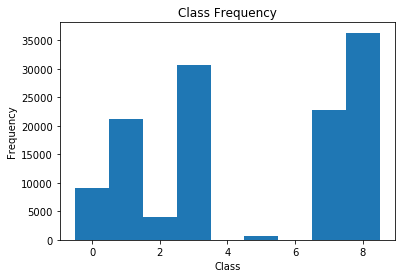

In [94]:
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [95]:
all_the_labels_test = []
for i in range(len(test)):
    all_the_labels_test.append(test[i][1])

In [98]:
unique2, counts2 = np.unique(all_the_labels_test, return_counts=True)

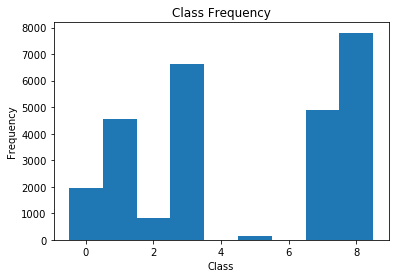

In [99]:
plt.bar(unique2, counts2, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [120]:
all_the_data = []
for i in range(len(train)):
    dat = train[i][0]
    dat = dat.numpy()
    #print(dat)
    all_the_data.append(dat)

In [105]:
levels = MaxNLocator(nbins=15).tick_values(0, 1)

In [153]:
cmap = plt.get_cmap('magma')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

In [132]:
y = np.asarray(list(range(0, 13)))

In [127]:
datt = np.asarray(all_the_data)

In [128]:
datt.shape

(125029, 45, 13)

In [133]:
datt[0]

array([[0.5187768 , 0.05412669, 0.23166376, 0.20485201, 0.47089046,
        0.41335452, 0.43645495, 0.4427765 , 0.4664728 , 0.48679927,
        0.44515914, 0.49397212, 0.21470161],
       [0.3754701 , 0.01078112, 0.2687734 , 0.20356725, 0.34071514,
        0.2918052 , 0.3037556 , 0.31871006, 0.34666517, 0.36140314,
        0.35031456, 0.37049207, 0.19013   ],
       [0.6228391 , 0.15798587, 0.2557116 , 0.24286123, 0.5810993 ,
        0.5230205 , 0.54366165, 0.5579239 , 0.5766835 , 0.58913964,
        0.5836041 , 0.5970123 , 0.4057135 ],
       [0.4401823 , 0.02131871, 0.28047124, 0.23926038, 0.39026213,
        0.33804935, 0.3600999 , 0.38379627, 0.41168183, 0.42738542,
        0.40835613, 0.43719432, 0.26666692],
       [0.2775481 , 0.00161137, 0.3325973 , 0.24259076, 0.2548134 ,
        0.22999915, 0.24216165, 0.27760074, 0.34906653, 0.3832125 ,
        0.38014543, 0.41614366, 0.12594739],
       [0.3079388 , 0.00492329, 0.2643823 , 0.1926742 , 0.2622464 ,
        0.2245365 , 0.22030

tensor(3)


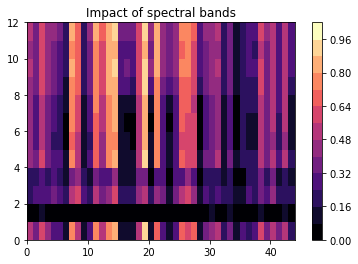

In [157]:
fig, ax = plt.subplots()

im = ax.pcolormesh(x, y, datt[0].T, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax)
ax.set_title('Impact of spectral bands')
print(all_the_labels[0])

tensor(8)


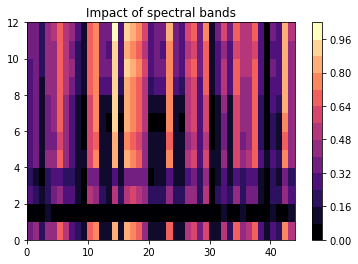

In [158]:
fig, ax = plt.subplots()

im = ax.pcolormesh(x, y, datt[1].T, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax)
ax.set_title('Impact of spectral bands')
print(all_the_labels[1])

tensor(1)


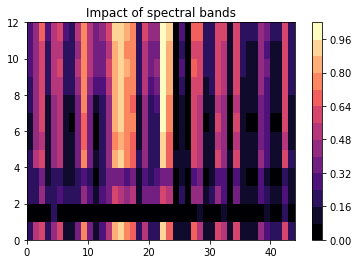

In [159]:
fig, ax = plt.subplots()

im = ax.pcolormesh(x, y, datt[2].T, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax)
ax.set_title('Impact of spectral bands')
print(all_the_labels[2])

In [163]:
all_the_0 = []
all_the_1 = []
all_the_2 = []
all_the_3 = []
all_the_4 = []
all_the_5 = []
all_the_6 = []
all_the_7 = []
all_the_8 = []

for i in range(len(train)):
    dat = train[i][0]
    dat = dat.numpy()
    if train[i][1] == 0:
        all_the_0.append(dat)
    elif train[i][1] == 1:
        all_the_1.append(dat)
    elif train[i][1] == 2:
        all_the_2.append(dat)
    elif train[i][1] == 3:
        all_the_3.append(dat)
    elif train[i][1] == 4:
        all_the_4.append(dat)
    elif train[i][1] == 5:
        all_the_5.append(dat)
    elif train[i][1] == 6:
        all_the_6.append(dat)
    elif train[i][1] == 7:
        all_the_7.append(dat)
    elif train[i][1] == 8:
        all_the_8.append(dat)

In [172]:
dtaaa = np.asarray(all_the_0)

In [192]:
# dtaaa

TypeError: Dimensions of C (13, 45) are incompatible with X (9131) and/or Y (45); see help(pcolormesh)

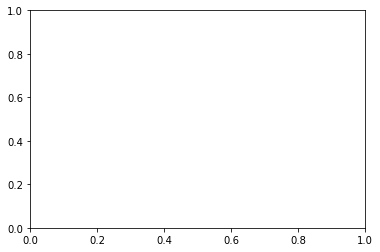

In [194]:
fig, ax = plt.subplots()

im = ax.pcolormesh(x, y, dtaaa[].T, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax)
ax.set_title('Impact of spectral bands')
print(all_the_labels[2])

In [182]:
z = np.arange(0, 13, 1)
x = np.arange(0, 9131, 1)
y = np.arange(0, 45, 1)

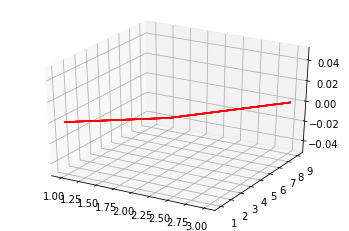